<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/Multiclass_Classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abstract

Rock Paper Scissors is a dataset containing 2,892 images of diverse hands in Rock/Paper/Scissors poses. It is licensed CC By 2.0 and available for all purposes, but it’s intent is primarily for learning and research.

#Overview

Rock Paper Scissors contains images from a variety of different hands,  from different races, ages and genders, posed into Rock / Paper or Scissors and labelled as such. You can download the training set here, and the test set here. These images have all been generated using CGI techniques as an experiment in determining if a CGI-based dataset can be used for classification against real images. I also generated a few images that you can use for predictions. You can find them here.

Note that all of this data is posed against a white background.

Each image is 300×300 pixels in 24-bit color

## Load Training dta

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip

--2019-07-27 14:33:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   162MB/s    in 1.2s    

2019-07-27 14:33:08 (162 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]



## Load Test data

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2019-07-27 14:33:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-test-set.z 100%[===================>]  28.15M   152MB/s    in 0.2s    

2019-07-27 14:33:34 (152 MB/s) - ‘/tmp/rps-test-set.zip’ saved [29516758/29516758]



## Create Training and Test Folders

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

## Set up data directories

In [6]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')
print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840


In [7]:
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

['rock04-113.png', 'rock02-113.png', 'rock07-k03-053.png', 'rock05ck01-104.png', 'rock05ck01-022.png', 'rock02-109.png', 'rock01-017.png', 'rock03-113.png', 'rock01-001.png', 'rock01-114.png']
['paper05-067.png', 'paper03-062.png', 'paper05-091.png', 'paper01-094.png', 'paper03-111.png', 'paper05-105.png', 'paper01-002.png', 'paper01-040.png', 'paper03-045.png', 'paper02-045.png']
['testscissors02-100.png', 'testscissors01-040.png', 'testscissors03-062.png', 'scissors01-020.png', 'scissors02-009.png', 'testscissors02-041.png', 'testscissors01-097.png', 'scissors04-101.png', 'testscissors01-045.png', 'testscissors02-117.png']


## Visualization of images

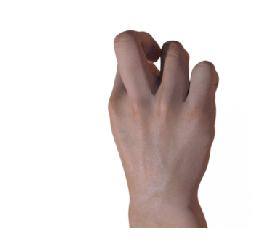

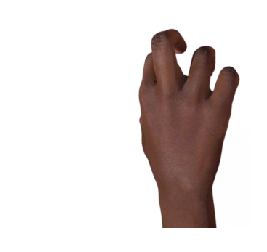

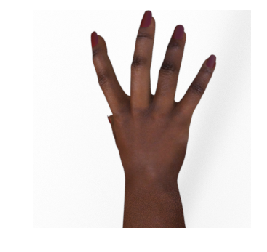

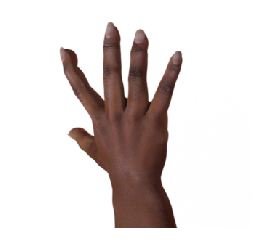

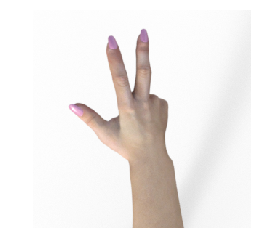

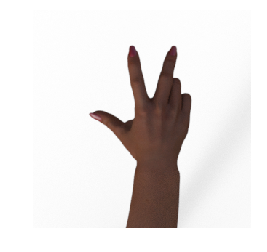

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## import keras libraries

In [0]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

## Image Augmentation

In [10]:
TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Build Model

In [11]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

W0727 14:49:51.819611 140367560910720 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Compile the Model

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Train the Model

In [13]:
history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

Epoch 1/25
79/79 [==============================] - 28s 354ms/step - loss: 1.1350 - acc: 0.3806 - val_loss: 0.9219 - val_acc: 0.8925
Epoch 2/25
79/79 [==============================] - 25s 316ms/step - loss: 0.8997 - acc: 0.5980 - val_loss: 0.4176 - val_acc: 0.9113
Epoch 3/25
79/79 [==============================] - 25s 321ms/step - loss: 0.5647 - acc: 0.7698 - val_loss: 0.6784 - val_acc: 0.6290
Epoch 4/25
79/79 [==============================] - 25s 318ms/step - loss: 0.3784 - acc: 0.8571 - val_loss: 0.0739 - val_acc: 0.9839
Epoch 5/25
79/79 [==============================] - 25s 320ms/step - loss: 0.3422 - acc: 0.8730 - val_loss: 0.0597 - val_acc: 0.9919
Epoch 6/25
79/79 [==============================] - 25s 316ms/step - loss: 0.2462 - acc: 0.9143 - val_loss: 0.1281 - val_acc: 0.9435
Epoch 7/25
79/79 [==============================] - 25s 321ms/step - loss: 0.2081 - acc: 0.9230 - val_loss: 0.1581 - val_acc: 0.9140
Epoch 8/25
79/79 [==============================] - 25s 315ms/step - 

## Visualization - Accuracy and Loss

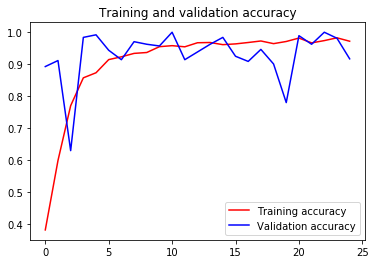

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

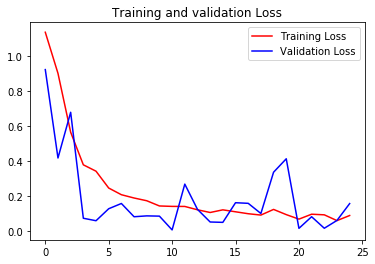

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()


plt.show()

## Predictions - Unseen Images

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  result = np.argmax(classes[0])
  #print(result)
  if result == 0:
    print(path + " is identified as paper")
  elif result == 1:
    print(path + " is identified as rock")
  else:
    print(path + " is identified as scissor")

Saving rock-hires1.png to rock-hires1.png
rock-hires1.png
[[0. 1. 0.]]
rock-hires1.png is identified as rock
